In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import colors
import datetime
import math

In [32]:
SM = pd.read_csv('/Users/katelynyu/Documents/Github/South_meadow_flights_7Aug2017.csv',parse_dates=[['Date', 'Time']], low_memory= False)
SM.head()

,Date_Time,Pressure,Temperature,RH
0,8/8/17 1:05:09 AM,96755.0,2910.0,333.0
1,8/8/17 1:05:10 AM,96747.0,2908.0,336.0
2,8/8/17 1:05:11 AM,96753.0,2906.0,335.0
3,8/8/17 1:05:12 AM,96762.0,2906.0,328.0
4,8/8/17 1:05:13 AM,96750.0,2908.0,332.0


In [33]:
DF = SM[338:440]
M1 = SM[574:678]
M2 = SM[974:1090]
CM = SM[1211:1309]

Flights = [DF, M1, M2, CM]

DF.head()

,Date_Time,Pressure,Temperature,RH
338,8/8/17 1:10:45 AM,96703.0,2796.0,355.0
339,8/8/17 1:10:46 AM,96707.0,2799.0,356.0
340,8/8/17 1:10:47 AM,96709.0,2806.0,356.0
341,8/8/17 1:10:48 AM,96714.0,2798.0,356.0
342,8/8/17 1:10:49 AM,96700.0,2776.0,359.0


In [34]:
def ten(x):
    return (x / 100 + 273.15)
def thousand(x):
    return x / 1000

def svp(T):
    L = 2.5 * math.pow(10,6) #J/kg
    R_v = 461 #J /(kg K)
    return (.611 * math.exp((L/R_v)*((1/273)-(1/T))))

DF.loc[:,('Temperature')] = DF.loc[:,('Temperature')].apply(ten)
DF.loc[:,('RH')] = DF.loc[:,('RH')].apply(thousand) 
DF['SVP'] = DF['Temperature'].apply(svp)

M1.loc[:,('Temperature')] = M1.loc[:,('Temperature')].apply(ten)
M1.loc[:,('RH')] = M1.loc[:,('RH')].apply(thousand) 
M1['SVP'] = M1['Temperature'].apply(svp)

M2.loc[:,('Temperature')] = M2.loc[:,('Temperature')].apply(ten)
M2.loc[:,('RH')] = M2.loc[:,('RH')].apply(thousand) 
M2['SVP'] = M2['Temperature'].apply(svp)

CM.loc[:,('Temperature')] = CM.loc[:,('Temperature')].apply(ten)
CM.loc[:,('RH')] = CM.loc[:,('RH')].apply(thousand) 
CM['SVP'] = CM['Temperature'].apply(svp)


DF.head()
#for dataframe in Flights:
#    dataframe.loc[:,('Temperature')] = dataframe.loc[:,('Temperature')].apply(ten)
#    dataframe.loc[:,('Temperature')] = pd.to_numeric(dataframe.loc[:,('Temperature')])
#    dataframe.loc[:,('RH')] = dataframe.loc[:,('RH')].apply(thousand) 
#    dataframe['svp'] = svp(dataframe.loc[:,'Temperature'])

#M1.head()


/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

,Date_Time,Pressure,Temperature,RH,SVP
338,8/8/17 1:10:45 AM,96703.0,301.11,0.355,3.903130
339,8/8/17 1:10:46 AM,96707.0,301.14,0.356,3.910139
340,8/8/17 1:10:47 AM,96709.0,301.21,0.356,3.926537
341,8/8/17 1:10:48 AM,96714.0,301.13,0.356,3.907801
342,8/8/17 1:10:49 AM,96700.0,300.91,0.359,3.856687


In [35]:
def partialpressure(RH, svp): #partial pressure of water vapor 
    return np.multiply(RH,svp)

DF['Partial P'] = np.multiply(DF['SVP'], DF['RH'])
M1['Partial P'] = np.multiply(M1['SVP'], M1['RH'])
M2['Partial P'] = np.multiply(M2['SVP'], M2['RH'])
CM['Partial P'] = np.multiply(CM['SVP'], CM['RH'])

DF.head()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

,Date_Time,Pressure,Temperature,RH,SVP,Partial P
338,8/8/17 1:10:45 AM,96703.0,301.11,0.355,3.903130,1.385611
339,8/8/17 1:10:46 AM,96707.0,301.14,0.356,3.910139,1.392010
340,8/8/17 1:10:47 AM,96709.0,301.21,0.356,3.926537,1.397847
341,8/8/17 1:10:48 AM,96714.0,301.13,0.356,3.907801,1.391177
342,8/8/17 1:10:49 AM,96700.0,300.91,0.359,3.856687,1.384550


In [36]:
DF['VPD_DF'] = DF['SVP'] - DF['Partial P']
M1['VPD_M1'] = M1['SVP'] - M1['Partial P']
M2['VPD_M2'] = M2['SVP'] - M2['Partial P']
CM['VPD_CM'] = CM['SVP'] - CM['Partial P']

print(DF)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


             Date_Time  Pressure  Temperature     RH       SVP  Partial P  \
338  8/8/17 1:10:45 AM   96703.0       301.11  0.355  3.903130   1.385611   
339  8/8/17 1:10:46 AM   96707.0       301.14  0.356  3.910139   1.392010   
340  8/8/17 1:10:47 AM   96709.0       301.21  0.356  3.926537   1.397847   
341  8/8/17 1:10:48 AM   96714.0       301.13  0.356  3.907801   1.391177   
342  8/8/17 1:10:49 AM   96700.0       300.91  0.359  3.856687   1.384550   
343  8/8/17 1:10:50 AM   96705.0       301.07  0.359  3.893802   1.397875   
344  8/8/17 1:10:51 AM   96705.0       301.04  0.363  3.886818   1.410915   
345  8/8/17 1:10:52 AM   96704.0       301.12  0.362  3.905465   1.413778   
346  8/8/17 1:10:53 AM   96719.0       301.26  0.362  3.938288   1.425660   
347  8/8/17 1:10:54 AM   96708.0       301.18  0.361  3.919502   1.414940   
348  8/8/17 1:10:55 AM   96707.0       301.19  0.360  3.921846   1.411865   
349  8/8/17 1:10:56 AM   96704.0       301.27  0.359  3.940642   1.414690   

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

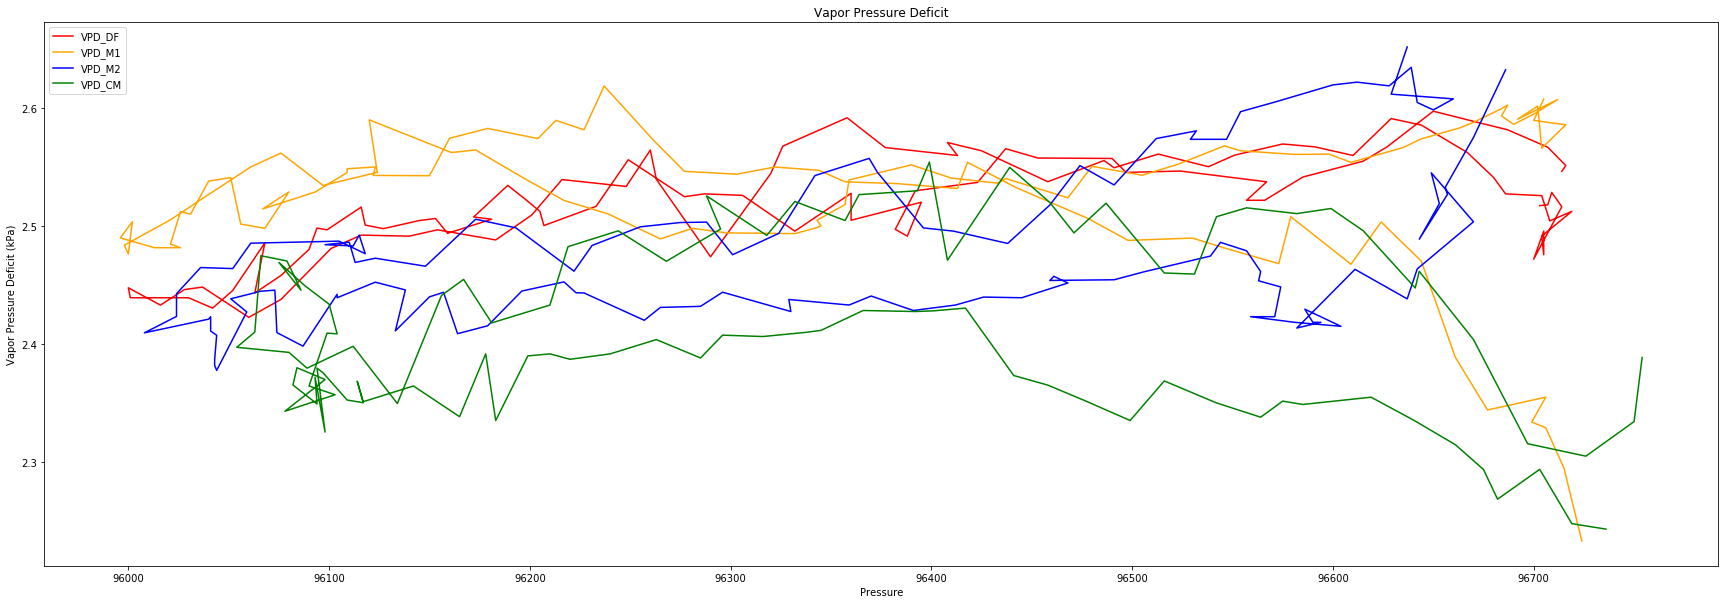

In [37]:
def legend(title, xaxis, yaxis):
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    ax = plt.gca()
    legend = ax.legend(loc='upper left')

#plotting VPD against pressure (altitude), very messy
#Main problem: Values for each flight do not align with each other
plt.figure(figsize = (30,10))
plt.plot(DF['Pressure'], DF['VPD_DF'], color= 'r')
plt.plot(M1['Pressure'], M1['VPD_M1'], color= 'orange')
plt.plot(M2['Pressure'], M2['VPD_M2'], color = 'b')
plt.plot(CM['Pressure'], CM['VPD_CM'], color = 'g')
legend('Vapor Pressure Deficit','Pressure', 'Vapor Pressure Deficit (kPa)')
plt.show()

In [38]:
#Sort by pressure values -- Lowest to highest 
DF_sorted = DF.sort_values('Pressure')
M1_sorted = M1.sort_values('Pressure')
M2_sorted = M2.sort_values('Pressure')
CM_sorted = CM.sort_values('Pressure')
DF_sorted.head()

,Date_Time,Pressure,Temperature,RH,SVP,Partial P,VPD_DF
387,8/8/17 1:11:34 AM,96000.0,300.59,0.353,3.783399,1.335540,2.447859
388,8/8/17 1:11:35 AM,96001.0,300.61,0.356,3.787942,1.348508,2.439435
386,8/8/17 1:11:33 AM,96016.0,300.49,0.353,3.760751,1.327545,2.433206
385,8/8/17 1:11:32 AM,96028.0,300.58,0.353,3.781128,1.334738,2.446390
389,8/8/17 1:11:36 AM,96030.0,300.61,0.356,3.787942,1.348508,2.439435


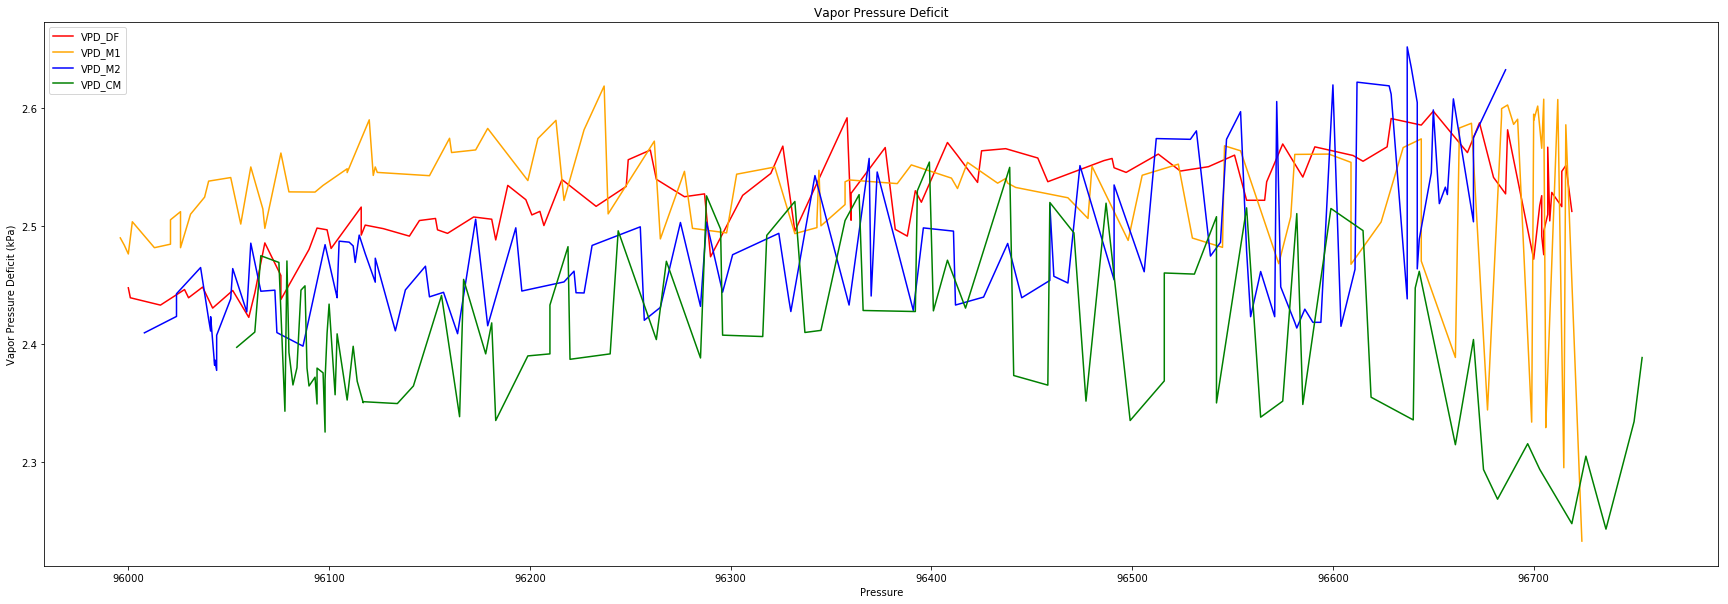

In [39]:
#plot with newly sorted values 
plt.figure(figsize = (30,10))
plt.plot(DF_sorted['Pressure'], DF_sorted['VPD_DF'], color='r')
plt.plot(M1_sorted['Pressure'], M1_sorted['VPD_M1'], color= 'orange')
plt.plot(M2_sorted['Pressure'], M2_sorted['VPD_M2'], color = 'b')
plt.plot(CM_sorted['Pressure'], CM_sorted['VPD_CM'], color = 'g')
legend('Vapor Pressure Deficit','Pressure', 'Vapor Pressure Deficit (kPa)')
plt.show()

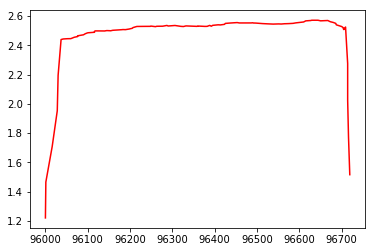

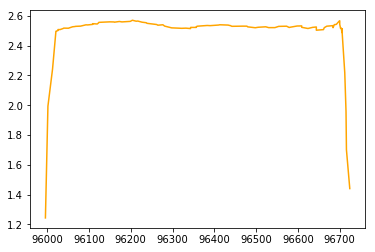

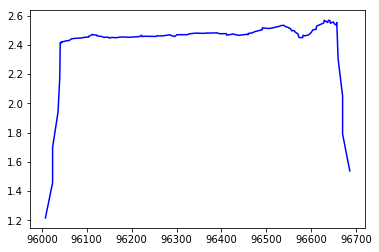

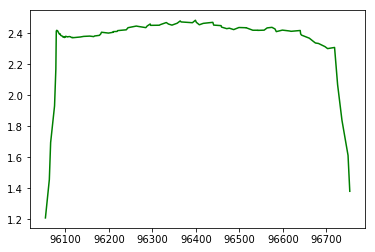

In [40]:
#Creating moving average 
#Problem -- MAJOR edge effects due to added 0s on both sides when using convolve function, lines wont show up on the same graph?
def window(size):
    return np.ones(size)/float(size)

plt.plot(DF_sorted['Pressure'],np.convolve(DF_sorted['VPD_DF'],window(10),'same'),'r')
plt.show()
plt.plot(M1_sorted['Pressure'],np.convolve(M1_sorted['VPD_M1'],window(10),'same'),'orange')
plt.show()
plt.plot(M2_sorted['Pressure'],np.convolve(M2_sorted['VPD_M2'],window(10),'same'),'b')
plt.show()
plt.plot(CM_sorted['Pressure'],np.convolve(CM_sorted['VPD_CM'],window(10),'same'),'g')
#plot(times,np.convolve(intensities,window(100),'same'),'b')

plt.show()

In [46]:
#Was able to get binned pressures with average vpd values, but could not figure out how to take the 
#average of the bin and graph as a scatter plot

#Creating 20 bins for pressure values 
bins = np.linspace(DF.Pressure.min(), DF.Pressure.max(), 20)
groups = DF.groupby(pd.cut(DF.Pressure, bins))
#finding the mean VPD of each bin 
DF_binned = groups.mean().VPD_DF

bins = np.linspace(M1.Pressure.min(), M1.Pressure.max(), 20)
groups = M1.groupby(pd.cut(M1.Pressure, bins))
M1_binned = groups.mean().VPD_M1

bins = np.linspace(M2.Pressure.min(), M2.Pressure.max(), 20)
groups = M2.groupby(pd.cut(M2.Pressure, bins))
M2_binned = groups.mean().VPD_M2

bins = np.linspace(CM.Pressure.min(), CM.Pressure.max(), 20)
groups = CM.groupby(pd.cut(CM.Pressure, bins))
CM_binned = groups.mean().VPD_CM

#converting back to dataframe 
DF_bin = pd.DataFrame(DF_binned)
M1_bin = pd.DataFrame(M1_binned)
M2_bin = pd.DataFrame(M2_binned)
CM_bin = pd.DataFrame(CM_binned)

#NOT NECESSSARY: Changing pressure from index to column -- DF_bin.reset_index(level=0, inplace=True)
print(DF_bin)
print(M1_bin)
print(M2_bin)
print(CM_bin)

All = DF_bin
All['VPD_M1'] = M1_bin['VPD_M1'].values
All['VPD_M2'] = M2_bin['VPD_M2'].values
#All['VPD_M_avg'] = M
All['VPD_CM'] = CM_bin['VPD_CM'].values

All['mean'] = All.mean(axis = 1)
All.head()


                           VPD_DF
Pressure                         
(96000, 96037.842]       2.441389
(96037.842, 96075.684]   2.445705
(96075.684, 96113.526]   2.475555
(96113.526, 96151.368]   2.500725
(96151.368, 96189.211]   2.504941
(96189.211, 96227.0526]  2.517004
(96227.0526, 96264.895]  2.542295
(96264.895, 96302.737]   2.508894
(96302.737, 96340.579]   2.533698
(96340.579, 96378.421]   2.547933
(96378.421, 96416.263]   2.528424
(96416.263, 96454.105]   2.556186
(96454.105, 96491.947]   2.550135
(96491.947, 96529.789]   2.551210
(96529.789, 96567.632]   2.538505
(96567.632, 96605.474]   2.559580
(96605.474, 96643.316]   2.568432
(96643.316, 96681.158]   2.574953
(96681.158, 96719]       2.520235
                           VPD_M1
Pressure                         
(95996, 96034.316]       2.493450
(96034.316, 96072.632]   2.524200
(96072.632, 96110.947]   2.541518
(96110.947, 96149.263]   2.557309
(96149.263, 96187.579]   2.565512
(96187.579, 96225.895]   2.556185
(96225.895, 96

,VPD_DF,VPD_M1,VPD_M2,VPD_CM,mean
Pressure,,,,,
"(96000, 96037.842]",2.441389,2.493450,2.419560,2.412282,2.441670
"(96037.842, 96075.684]",2.445705,2.524200,2.433575,2.373615,2.444274
"(96075.684, 96113.526]",2.475555,2.541518,2.464869,2.385292,2.466808
"(96113.526, 96151.368]",2.500725,2.557309,2.452314,2.388212,2.474640
"(96151.368, 96189.211]",2.504941,2.565512,2.443680,2.423790,2.484481


In [53]:
#making an climatology

vpd_climatology = All.sub(All.mean(axis=1), axis=0)
vpd_climatology.head()

,VPD_DF,VPD_M1,VPD_M2,VPD_CM,mean
Pressure,,,,,
"(96000, 96037.842]",-0.000281,0.051780,-0.022110,-0.029388,0.0
"(96037.842, 96075.684]",0.001432,0.079926,-0.010699,-0.070659,0.0
"(96075.684, 96113.526]",0.008747,0.074709,-0.001940,-0.081517,0.0
"(96113.526, 96151.368]",0.026085,0.082669,-0.022326,-0.086428,0.0
"(96151.368, 96189.211]",0.020460,0.081031,-0.040801,-0.060691,0.0


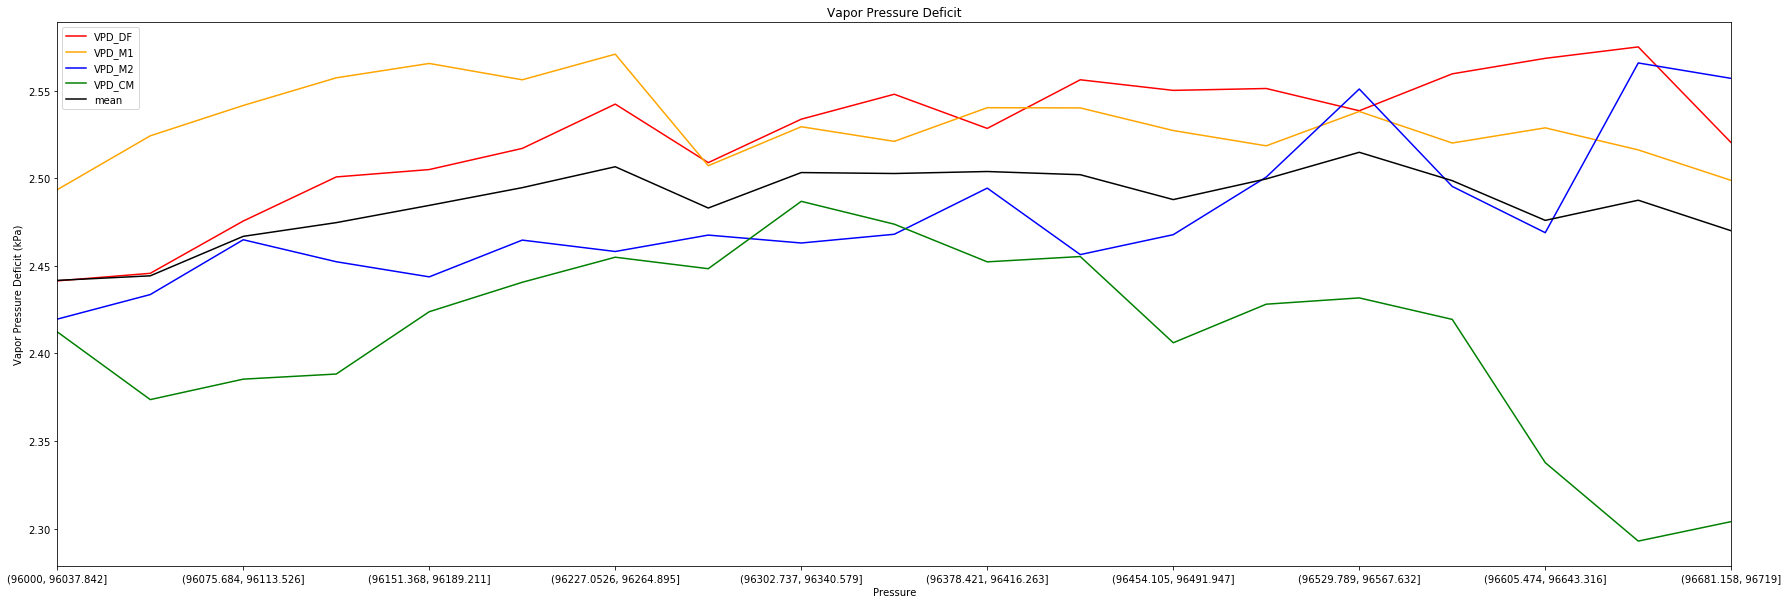

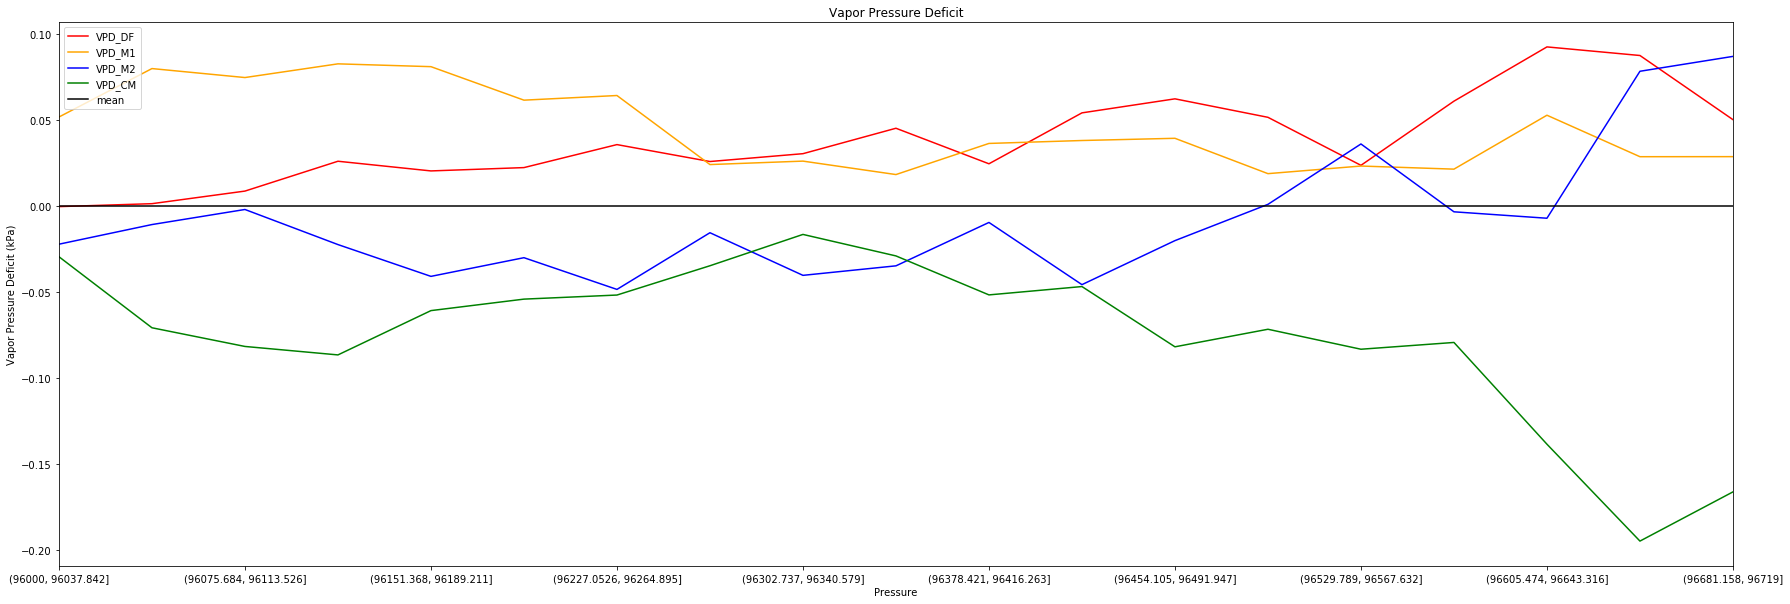

In [54]:
#Got the graph, but not all the points are perfectly matched up due to varying bins 
#ax = DF_bin.plot.line(figsize=(30, 10))
#M1_bin.plot.line(ax=ax)
#M2_bin.plot.line(ax=ax)
#CM_bin.plot.line(ax=ax)
All.plot.line(figsize=(30,10), color = ('r', 'orange', 'b', 'g', 'k'))
legend('Vapor Pressure Deficit','Pressure', 'Vapor Pressure Deficit (kPa)')
plt.show()

vpd_climatology.plot.line(figsize=(30,10), color = ('r', 'orange', 'b', 'g', 'k'))
legend('Vapor Pressure Deficit','Pressure', 'Vapor Pressure Deficit (kPa)')
plt.show()



In [44]:
#making an average plot 
Climatology = 